In [1]:
#Importing the required Libraries
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#plt.rcParams['figure.figsize'] = (16, 8)
#plt.style.use('fivethirtyeight')


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/GoogleColab/data\ science\ go\ pro

/content/drive/MyDrive/GoogleColab/data science go pro


In [4]:
df = pd.read_csv("data.csv")
df

,price,mileage,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Stock #,Cabin,Bed,Rear Wheel
0,"$4,999","149,499 miles",Komfort,automatic,I-4 cyl2.0L,FWD,WVWJK73C29P002740,gasoline,Island Gray,Black,used,149499.0,19 city / 29 hwy,sedan,4.0,PN21559B,NaN,NaN,NaN
1,"$4,999","92,468 miles",SEL,automatic,Duratec 3.0L V6 24V,FWD,1FAFP24145G107125,gasoline,Redfire Clearcoat Metallic,Shale,used,92468.0,19 city / 26 hwy,sedan,4.0,27470B,NaN,NaN,NaN
2,"$4,998","172,962 miles",LX,manual,2.0L 4 Cylinder Engine,FWD,KNAFT4A24D5717273,gasoline,Clear White,Stone,used,172962.0,25 city / 34 hwy,sedan,4.0,D5717273A,NaN,NaN,NaN
3,"$4,799","86,905 miles",S,manual,1.6L 4 Cylinder Engine,FWD,3FADP4AJ7FM104573,gasoline,Black,Smoke Storm,used,86905.0,NaN,sedan,4.0,FM104573,NaN,NaN,NaN
4,"$3,980","156,281 miles",GLI,automatic,2.0L 4 Cylinder Engine,FWD,3VWXJ71K86M764685,gasoline,SHADOW BLUE,NaN,used,156281.0,22 city / 29 hwy,sedan,4.0,40706,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30299,"$30,998","35,749 miles",V6 SEL 4Motion,automatic,3.6L,AWD,1V2ME2CA9LC232617,gasoline,Black,BLACK,used,35749.0,16 city / 22 hwy,suv,4.0,24806832,NaN,NaN,NaN
30300,"$30,998","22,132 miles",Pro S,automatic,0.0L,RWD,WVGKMPE29MP062795,electric,White,GRAY,used,22132.0,104 city / 89 hwy,suv,4.0,25181004,NaN,NaN,NaN
30301,"$26,998","11,799 miles",Limited,automatic,2.0L,AWD,4S3GTAU63M3700402,gasoline,Blue,TAN,used,11799.0,28 city / 36 hwy,wagon,4.0,25133659,NaN,NaN,NaN
30302,"$48,998","25,185 miles",RST,automatic,3.0L,4X4,3GCUYEET5MG330373,diesel,White,BLACK,used,25185.0,22 city / 26 hwy,pickup,4.0,24985150,crew,regular,single


In [5]:
df.columns

Index(['price', 'mileage', 'Trim', 'Transmission', 'Engine', 'Drivetrain',
       'VIN', 'Fuel Type', 'Exterior Color', 'Interior Color', 'Condition',
       'Mileage', 'Gas Mileage', 'Body Style', 'Doors', 'Stock #', 'Cabin',
       'Bed', 'Rear Wheel'],
      dtype='object')

In [7]:
df['price'] = df['price'].str.replace('$', '')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30304 entries, 0 to 30303
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           30304 non-null  object 
 1   mileage         30304 non-null  object 
 2   Trim            30032 non-null  object 
 3   Transmission    30201 non-null  object 
 4   Engine          29812 non-null  object 
 5   Drivetrain      29800 non-null  object 
 6   VIN             30302 non-null  object 
 7   Fuel Type       20338 non-null  object 
 8   Exterior Color  29809 non-null  object 
 9   Interior Color  28243 non-null  object 
 10  Condition       30302 non-null  object 
 11  Mileage         30193 non-null  float64
 12  Gas Mileage     18692 non-null  object 
 13  Body Style      30284 non-null  object 
 14  Doors           20336 non-null  float64
 15  Stock #         29337 non-null  object 
 16  Cabin           6889 non-null   object 
 17  Bed             6889 non-null  

Number of Missing Values in our data set



,Variable,Missing Values
0,price,0
1,mileage,0
2,Trim,272
3,Transmission,103
4,Engine,492
5,Drivetrain,504
6,VIN,2
7,Fuel Type,9966
8,Exterior Color,495
9,Interior Color,2061



 Percentage of Missing Values in our data set


,Count
price,0.000000
mileage,0.000000
Trim,0.897571
Transmission,0.339889
Engine,1.623548
Drivetrain,1.663147
VIN,0.006600
Fuel Type,32.886748
Exterior Color,1.633448
Interior Color,6.801082


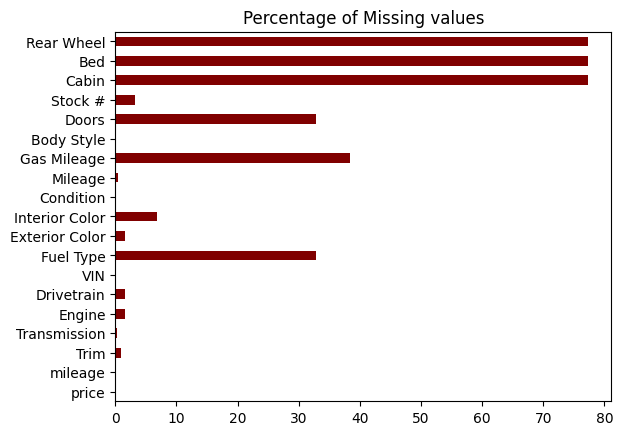

In [9]:
print("Number of Missing Values in our data set\n")
missing_df = df.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_df.style.background_gradient('gnuplot2_r'))
print("\n Percentage of Missing Values in our data set")
display((df.isnull().sum() / (len(df.index)) * 100).head(20).to_frame().rename({0:'Count'}, axis = 1).style.background_gradient('gnuplot2_r'))
round((df.isnull().sum() / (len(df.index)) * 100) , 2).plot(kind = 'barh',color ='maroon')

plt.title("Percentage of Missing values")

In [10]:
df['Doors'].fillna(df['Doors'].mode()[0], inplace = True)

In [11]:
columns_to_drop = ['Cabin', 'Bed', 'Rear Wheel']
df = df.drop(columns=columns_to_drop)
df

,price,mileage,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Stock #
0,"4,999","149,499 miles",Komfort,automatic,I-4 cyl2.0L,FWD,WVWJK73C29P002740,gasoline,Island Gray,Black,used,149499.0,19 city / 29 hwy,sedan,4.0,PN21559B
1,"4,999","92,468 miles",SEL,automatic,Duratec 3.0L V6 24V,FWD,1FAFP24145G107125,gasoline,Redfire Clearcoat Metallic,Shale,used,92468.0,19 city / 26 hwy,sedan,4.0,27470B
2,"4,998","172,962 miles",LX,manual,2.0L 4 Cylinder Engine,FWD,KNAFT4A24D5717273,gasoline,Clear White,Stone,used,172962.0,25 city / 34 hwy,sedan,4.0,D5717273A
3,"4,799","86,905 miles",S,manual,1.6L 4 Cylinder Engine,FWD,3FADP4AJ7FM104573,gasoline,Black,Smoke Storm,used,86905.0,NaN,sedan,4.0,FM104573
4,"3,980","156,281 miles",GLI,automatic,2.0L 4 Cylinder Engine,FWD,3VWXJ71K86M764685,gasoline,SHADOW BLUE,NaN,used,156281.0,22 city / 29 hwy,sedan,4.0,40706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30299,"30,998","35,749 miles",V6 SEL 4Motion,automatic,3.6L,AWD,1V2ME2CA9LC232617,gasoline,Black,BLACK,used,35749.0,16 city / 22 hwy,suv,4.0,24806832
30300,"30,998","22,132 miles",Pro S,automatic,0.0L,RWD,WVGKMPE29MP062795,electric,White,GRAY,used,22132.0,104 city / 89 hwy,suv,4.0,25181004
30301,"26,998","11,799 miles",Limited,automatic,2.0L,AWD,4S3GTAU63M3700402,gasoline,Blue,TAN,used,11799.0,28 city / 36 hwy,wagon,4.0,25133659
30302,"48,998","25,185 miles",RST,automatic,3.0L,4X4,3GCUYEET5MG330373,diesel,White,BLACK,used,25185.0,22 city / 26 hwy,pickup,4.0,24985150


In [13]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,price,mileage,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Stock #
0,"4,999","149,499 miles",Komfort,automatic,I-4 cyl2.0L,FWD,WVWJK73C29P002740,gasoline,Island Gray,Black,used,149499.0,19 city / 29 hwy,sedan,4.0,PN21559B
1,"4,999","92,468 miles",SEL,automatic,Duratec 3.0L V6 24V,FWD,1FAFP24145G107125,gasoline,Redfire Clearcoat Metallic,Shale,used,92468.0,19 city / 26 hwy,sedan,4.0,27470B
2,"4,998","172,962 miles",LX,manual,2.0L 4 Cylinder Engine,FWD,KNAFT4A24D5717273,gasoline,Clear White,Stone,used,172962.0,25 city / 34 hwy,sedan,4.0,D5717273A
3,"4,999","134,948 miles",Base,automatic,2.7L V6 MPI DOHC 24V,RWD,2C3LA43R27H860231,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,134948.0,18 city / 26 hwy,sedan,4.0,SK1691P
4,"4,923","100,013 miles",1.6 SV,automatic,1.6L I4 DOHC 16V,FWD,3N1CN7AP6CL925878,gasoline,Blue Onyx Metallic,Charcoal,used,100013.0,30 city / 38 hwy,sedan,4.0,SK1690P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18484,"30,998","35,749 miles",V6 SEL 4Motion,automatic,3.6L,AWD,1V2ME2CA9LC232617,gasoline,Black,BLACK,used,35749.0,16 city / 22 hwy,suv,4.0,24806832
18485,"30,998","22,132 miles",Pro S,automatic,0.0L,RWD,WVGKMPE29MP062795,electric,White,GRAY,used,22132.0,104 city / 89 hwy,suv,4.0,25181004
18486,"26,998","11,799 miles",Limited,automatic,2.0L,AWD,4S3GTAU63M3700402,gasoline,Blue,TAN,used,11799.0,28 city / 36 hwy,wagon,4.0,25133659
18487,"48,998","25,185 miles",RST,automatic,3.0L,4X4,3GCUYEET5MG330373,diesel,White,BLACK,used,25185.0,22 city / 26 hwy,pickup,4.0,24985150


In [14]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['price',
 'mileage',
 'Trim',
 'Transmission',
 'Engine',
 'Drivetrain',
 'VIN',
 'Fuel Type',
 'Exterior Color',
 'Interior Color',
 'Condition',
 'Gas Mileage',
 'Body Style',
 'Stock #']

In [ ]:
for col in categorical:
    df[col] = df[col].str.lower().str.replace(" ", "_")

df.head()

,price,mileage,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Stock #
0,"4,999","149,499_miles",komfort,automatic,i-4_cyl2.0l,fwd,wvwjk73c29p002740,gasoline,island_gray,black,used,149499.0,19_city_/_29_hwy,sedan,4.0,pn21559b
1,"4,999","92,468_miles",sel,automatic,duratec_3.0l_v6_24v,fwd,1fafp24145g107125,gasoline,redfire_clearcoat_metallic,shale,used,92468.0,19_city_/_26_hwy,sedan,4.0,27470b
2,"4,998","172,962_miles",lx,manual,2.0l_4_cylinder_engine,fwd,knaft4a24d5717273,gasoline,clear_white,stone,used,172962.0,25_city_/_34_hwy,sedan,4.0,d5717273a
3,"4,999","134,948_miles",base,automatic,2.7l_v6_mpi_dohc_24v,rwd,2c3la43r27h860231,gasoline,blaze_red_crystal_pearlcoat/black_cloth_top,dk/lt_slate_gray,used,134948.0,18_city_/_26_hwy,sedan,4.0,sk1691p
4,"4,923","100,013_miles",1.6_sv,automatic,1.6l_i4_dohc_16v,fwd,3n1cn7ap6cl925878,gasoline,blue_onyx_metallic,charcoal,used,100013.0,30_city_/_38_hwy,sedan,4.0,sk1690p


In [15]:
for col in categorical:
    print(col)
    print(df[col].unique())
    print("Number of unique classes ",df[col].nunique())
    print('\n')

price
['4,999' '4,998' '4,923' ... '80,998' '61,998' '10,599']
Number of unique classes  1366


mileage
['149,499 miles' '92,468 miles' '172,962 miles' ... '46,628 miles'
 '34,532 miles' '86,087 miles']
Number of unique classes  4758


Trim
['Komfort' 'SEL' 'LX' 'Base' '1.6 SV' '2.5 S' 'LE' '1.6 S' 'E 320' 'SE'
 'GS' '2.0 SR' 'SXT' 'Sport' 'Touring' 'GLS' 'Eddie Bauer' 'EX' 'S'
 'Limited' 'LT' 'SL' 'LE 7-Passenger' 'LS' 'SLT-2' 'SLT-1' '3.5 SV'
 'LS Fleet' 'Touring-L' 'LX-P' '3.8L V6' 'LTZ' 'American Value Package'
 '3.5 SE' 'XLE' 'XLE 8-Passenger' 'XL' 'SE 2.0T' 'Big Horn'
 'Laramie Longhorn' 'SR' 'Work Truck' 'Raptor' 'XLT' 'Platinum'
 'PreRunner V6' 'High Altitude' 'Denali' 'TRD Sport' 'SR V6'
 '1794 Edition' 'SR5' 'SLT' 'SV' 'Warlock' 'LT Trail Boss' 'Custom'
 'SR5 V6' 'RTL' 'Elevation' 'Custom Trail Boss' 'Laramie' 'Express'
 'Rebel' 'Night' 'Desert Runner' 'Lariat' 'PRO-4X' 'Elevation Standard'
 'TRD Off-Road' 'King Ranch' 'Rubicon' 'Z71' 'TRD Pro HV' 'AT4' 'TRD Pro'
 'SLE' 'SEL 

In [16]:
columns_to_drop = ['VIN', 'Stock #', 'mileage']
df = df.drop(columns=columns_to_drop)
df

,price,Trim,Transmission,Engine,Drivetrain,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors
0,"4,999",Komfort,automatic,I-4 cyl2.0L,FWD,gasoline,Island Gray,Black,used,149499.0,19 city / 29 hwy,sedan,4.0
1,"4,999",SEL,automatic,Duratec 3.0L V6 24V,FWD,gasoline,Redfire Clearcoat Metallic,Shale,used,92468.0,19 city / 26 hwy,sedan,4.0
2,"4,998",LX,manual,2.0L 4 Cylinder Engine,FWD,gasoline,Clear White,Stone,used,172962.0,25 city / 34 hwy,sedan,4.0
3,"4,999",Base,automatic,2.7L V6 MPI DOHC 24V,RWD,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,134948.0,18 city / 26 hwy,sedan,4.0
4,"4,923",1.6 SV,automatic,1.6L I4 DOHC 16V,FWD,gasoline,Blue Onyx Metallic,Charcoal,used,100013.0,30 city / 38 hwy,sedan,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18484,"30,998",V6 SEL 4Motion,automatic,3.6L,AWD,gasoline,Black,BLACK,used,35749.0,16 city / 22 hwy,suv,4.0
18485,"30,998",Pro S,automatic,0.0L,RWD,electric,White,GRAY,used,22132.0,104 city / 89 hwy,suv,4.0
18486,"26,998",Limited,automatic,2.0L,AWD,gasoline,Blue,TAN,used,11799.0,28 city / 36 hwy,wagon,4.0
18487,"48,998",RST,automatic,3.0L,4X4,diesel,White,BLACK,used,25185.0,22 city / 26 hwy,pickup,4.0


In [17]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:
    df[df[i]<0]
    print("Records with Negative values in %s : " %i,df[df[i]<0])
    print('\n')

Records with Negative values in Mileage :  Empty DataFrame
Columns: [price, Trim, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Mileage, Gas Mileage, Body Style, Doors]
Index: []


Records with Negative values in Doors :  Empty DataFrame
Columns: [price, Trim, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Mileage, Gas Mileage, Body Style, Doors]
Index: []




In [18]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:
   df[df[i]==0]
   print("Records with 0 values in %s : " %i,df[df[i]==0])
   print('\n')
    #ax = sns.distplot(df[i], color = 'purple')
    #plt.title("Negative values in %s" %i, fontsize = 20)
    #plt.xlabel(" ")
    #plt.ylabel(" ")
    #plt.xticks(fontsize = 15)
    #plt.show();

Records with 0 values in Mileage :  Empty DataFrame
Columns: [price, Trim, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Mileage, Gas Mileage, Body Style, Doors]
Index: []


Records with 0 values in Doors :  Empty DataFrame
Columns: [price, Trim, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Mileage, Gas Mileage, Body Style, Doors]
Index: []




In [19]:
df.corr().style.background_gradient("copper_r")

,Mileage,Doors
Mileage,1.000000,-0.169572
Doors,-0.169572,1.000000


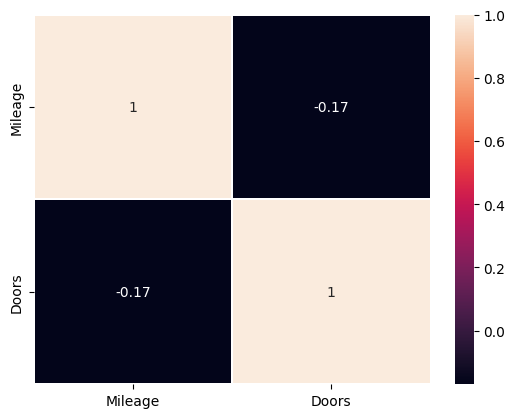

In [20]:
sns.heatmap(df.corr(),annot = True, lw = 0.1);

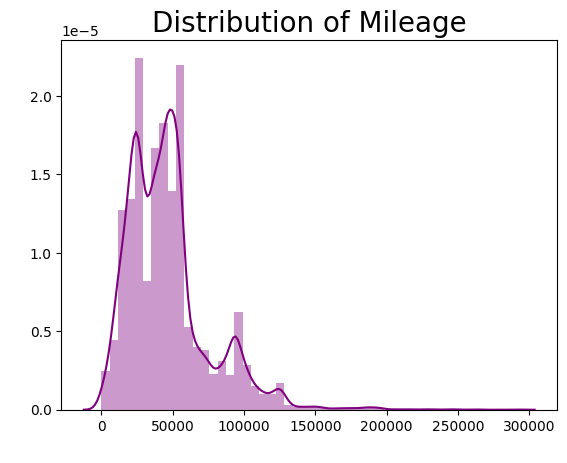

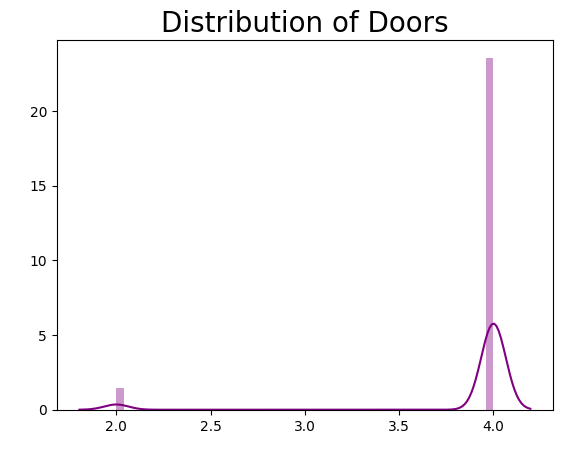

In [21]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:

    ax = sns.distplot(df[i], color = 'purple')
    plt.title("Distribution of %s" %i, fontsize = 20)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 10)
    plt.show();
    print('\n')

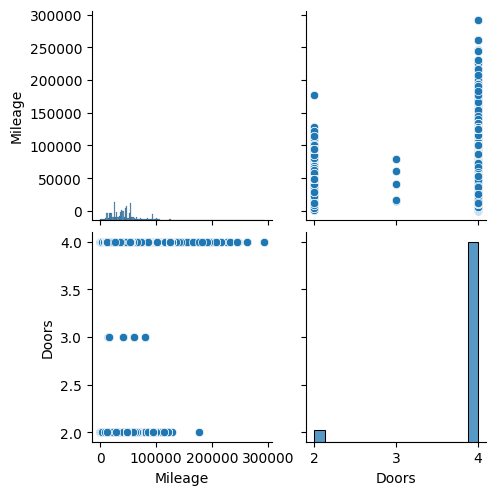

In [22]:
sns.pairplot(df)

In [23]:
# nrows = 2
# ncols = 4
# i = 0
# fig, ax = plt.subplots(nrows, ncols, figsize = (16,8),)
# for row in range(nrows):
#     for col in range(ncols):
#         sns.scatterplot(df[numerical].iloc[:, i],df['price'],ax = ax[row, col],color = 'maroon' ).set(ylabel = '')
#         plt.tight_layout()
#         i += 1

In [24]:
#Creating a function for ordering the groups in a column as per their frequency
def sort_order(column):
    orders = (df.groupby([column]).mean().sort_values(by ='price', ascending = False)).index
    return orders

In [25]:
# #Looping over categorical variables to check the Price over different Groups
# for i in categorical:
#     if df[i].nunique() < 72:
#         f,ax=plt.subplots(figsize=(20,10))
#         sns.barplot(df[i],df['price'], order = sort_order(i), palette='coolwarm')
#         plt.title("Bar Plot of %s" %i, fontsize = 20)
#         plt.xticks(fontsize = 12)
#         plt.xlabel("%s"%i)
#         plt.ylabel("Car Price")
#         plt.xticks(fontsize = 15, rotation = 90)
#         plt.show();
#         print('\n')

In [26]:
# for i in categorical:
#     if df[i].nunique() < 70:
#         f,ax=plt.subplots(figsize=(20,10))
#         df[i].value_counts().plot(kind='pie')
#         plt.title("Pie Plot of %s" %i, fontsize = 20)
#         plt.xticks(fontsize = 12)
#         plt.xlabel("%s"%i)
#         #plt.ylabel("Car Price")
#         plt.xticks(fontsize = 15, rotation = 90)
#         plt.show();
#         print('\n')

In [27]:
#  f,ax=plt.subplots(figsize=(12,7))
#  sns.boxplot(x=df['Transmission'],y=df['price'],hue=df['Transmission'])

In [ ]:
# final=pd.get_dummies(df, columns=['Trim'])
# final

In [28]:
df['Trim'] = df['Trim'].astype('category').cat.codes + 1
df['Transmission'] = df['Transmission'].astype('category').cat.codes + 1
df['Engine'] = df['Engine'].astype('category').cat.codes + 1
df['Drivetrain'] = df['Drivetrain'].astype('category').cat.codes + 1
df['Exterior Color'] = df['Exterior Color'].astype('category').cat.codes + 1
df['Interior Color'] = df['Interior Color'].astype('category').cat.codes + 1
df['Condition'] = df['Condition'].astype('category').cat.codes + 1
df['Body Style'] = df['Body Style'].astype('category').cat.codes + 1
df['Gas Mileage'] = df['Gas Mileage'].astype('category').cat.codes + 1
df['Body Style'] = df['Body Style'].astype('category').cat.codes + 1
df['Gas Mileage'] = df['Gas Mileage'].astype('category').cat.codes + 1
df['Fuel Type'] = df['Fuel Type'].astype('category').cat.codes + 1

In [29]:
df

,price,Trim,Transmission,Engine,Drivetrain,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors
0,"4,999",205,1,231,3,4,125,10,2,149499.0,93,5,4.0
1,"4,999",331,1,186,3,4,188,117,2,92468.0,90,5,4.0
2,"4,998",229,2,13,3,4,68,120,2,172962.0,158,5,4.0
3,"4,999",116,1,55,4,4,31,58,2,134948.0,83,5,4.0
4,"4,923",8,1,10,3,4,37,37,2,100013.0,212,5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18484,"30,998",441,1,104,2,4,23,5,2,35749.0,61,6,4.0
18485,"30,998",304,1,2,4,2,241,65,2,22132.0,4,6,4.0
18486,"26,998",248,1,12,2,4,33,121,2,11799.0,188,8,4.0
18487,"48,998",309,1,60,1,1,241,5,2,25185.0,119,4,4.0


In [30]:
df.dtypes

price              object
Trim                int16
Transmission         int8
Engine              int16
Drivetrain           int8
Fuel Type            int8
Exterior Color      int16
Interior Color      int16
Condition            int8
Mileage           float64
Gas Mileage         int16
Body Style           int8
Doors             float64
dtype: object

In [31]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for col in ['Trim','Transmission','Engine','Drivetrain','Exterior Color','Interior Color','Condition', 'Body Style', 'Gas Mileage']: df[col] = label_encoder.fit_transform(df[col])

In [32]:
df.head()

,price,Trim,Transmission,Engine,Drivetrain,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors
0,"4,999",204,0,230,2,4,124,9,1,149499.0,92,4,4.0
1,"4,999",330,0,185,2,4,187,116,1,92468.0,89,4,4.0
2,"4,998",228,1,12,2,4,67,119,1,172962.0,157,4,4.0
3,"4,999",115,0,54,3,4,30,57,1,134948.0,82,4,4.0
4,"4,923",7,0,9,2,4,36,36,1,100013.0,211,4,4.0


In [33]:
df['price'] = df['price'].str.replace(',', '')

In [34]:
x = df[['Trim','Transmission','Engine','Drivetrain','Exterior Color','Interior Color','Condition', 'Body Style', 'Gas Mileage']].values
y = df['price'].values

print(x.shape)
print(y.shape)

(18489, 9)
(18489,)


In [35]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14791, 9)
(14791, 1)
(3698, 9)
(3698, 1)


In [62]:
norm = StandardScaler().fit(x_train)

# transform training data
x_train = norm.transform(x_train)

# transform testing data
x_test = norm.transform(x_test)

y_train = norm.transform(y_train)
y_test = norm.transform(y_test)

ValueError: ignored

In [64]:
norm = StandardScaler().fit(y_train)

y_train = norm.transform(y_train)
y_test = norm.transform(y_test)

In [65]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",lr_model.score(x_train,y_train))
print("Testing Accuracy :",lr_model.score(x_test,y_test))

Training Accuracy : 0.32644597341470916
Testing Accuracy : 0.34723860236889037


In [66]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.8952244807393483

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [68]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'friedman_mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9177919829676402

In [69]:
y_pred = Rf.predict(x_test)
y_pred[0:5]

array([-1.01011469,  1.74893465, -0.38335173, -0.0825895 ,  0.48894725])

Text(0, 0.5, 'Predicted Values')

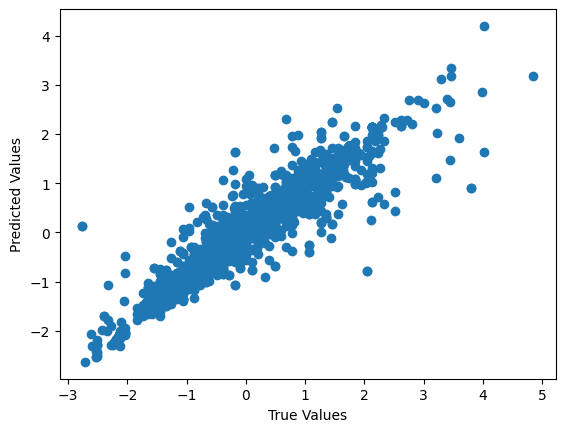

In [70]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

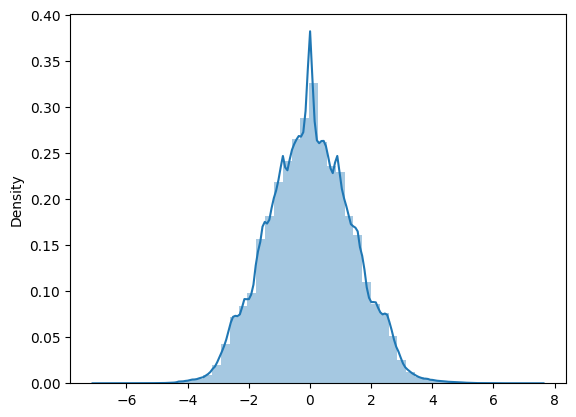

In [71]:
sns.distplot((y_test-y_pred),bins=50)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [57]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error :  0.08202599096609856
MAE :  0.11986901500228131
RSME :  0.28640179986532655


In [58]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 123 , max_depth = 7 , learning_rate = 0.2 , n_estimators = 1500)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [59]:
Rf_train_pred = xgb.predict(x_train)
Rf_test_pred = xgb.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9358415845027139

In [60]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [61]:
Rf_train_pred = linear.predict(x_train)
Rf_test_pred = linear.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.3472386023688905